## File Preparation
**Instal kaggle and upload kaggle.json file**

In [3]:
! pip install -q kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"theare","key":"2c74786f50c65d45e061a59b8723b322"}'}

**Download datasets from kaggle**

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

! kaggle datasets download -d schemersays/food-recommendation-system

ref                                                                   title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                      25KB  2023-04-13 09:55:16          39464       1128  1.0              
tawfikelmetwally/automobile-dataset                                   Car information dataset                            6KB  2023-05-28 18:26:48           6691        171  0.9411765        
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                22KB  2023-05-12 13:06:39           8331        173  1.0              
mohithsairamreddy/salary-data                

**Create datasets directory and unzip file**

In [5]:
! mkdir datasets
! unzip food-recommendation-system.zip -d datasets

Archive:  food-recommendation-system.zip
  inflating: datasets/1662574418893344.csv  
  inflating: datasets/ratings.csv    


## Data Understanding
**Import main lib**

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Load data file**

In [213]:
food_df = pd.read_csv('datasets/1662574418893344.csv')
rating_df = pd.read_csv('datasets/ratings.csv')

**Liat data food**

In [214]:
food_df.head()

,Food_ID,Name,C_Type,Veg_Non,Describe
0,1,summer squash salad,Healthy Food,veg,"white balsamic vinegar, lemon juice, lemon rin..."
1,2,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni..."
2,3,sweet chilli almonds,Snack,veg,"almonds whole, egg white, curry leaves, salt, ..."
3,4,tricolour salad,Healthy Food,veg,"vinegar, honey/sugar, soy sauce, salt, garlic ..."
4,5,christmas cake,Dessert,veg,"christmas dry fruits (pre-soaked), orange zest..."


**Liat food dataframe info dan unik data berdasarkan Food_ID dan C_Type**

In [215]:
food_df.info()
print('Banyak data makanan: ', len(food_df.Food_ID.unique()))
print('Banyak tipe makanan: ', len(food_df.C_Type.unique()))
print('Tipe makanan: ', food_df.C_Type.unique())
print('Jenis makanan: ', food_df.Veg_Non.unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food_ID   400 non-null    int64 
 1   Name      400 non-null    object
 2   C_Type    400 non-null    object
 3   Veg_Non   400 non-null    object
 4   Describe  400 non-null    object
dtypes: int64(1), object(4)
memory usage: 15.8+ KB
Banyak data makanan:  400
Banyak tipe makanan:  16
Tipe makanan:  ['Healthy Food' 'Snack' 'Dessert' 'Japanese' 'Indian' 'French' 'Mexican'
 'Italian' 'Chinese' 'Beverage' 'Thai' 'Korean' ' Korean' 'Vietnames'
 'Nepalese' 'Spanish']
Jenis makanan:  ['veg' 'non-veg']


**Cek jika ada data null atau duplikat pada data food**

In [216]:
# Cek jika ada data null pada data food
food_df.isnull().sum()

Food_ID     0
Name        0
C_Type      0
Veg_Non     0
Describe    0
dtype: int64

In [217]:
# Cek jika ada data duplikat pada data food
food_df.duplicated().sum()

0

**Liat deskripsi data food**

In [218]:
food_df.describe()

,Food_ID
count,400.000000
mean,200.500000
std,115.614301
min,1.000000
25%,100.750000
50%,200.500000
75%,300.250000
max,400.000000


**Liat data rating**

In [219]:
rating_df.head()

,User_ID,Food_ID,Rating
0,1.0,88.0,4.0
1,1.0,46.0,3.0
2,1.0,24.0,5.0
3,1.0,25.0,4.0
4,2.0,49.0,1.0


**Liat rating dataframe info dan jumlah unik data berdasarkan User_ID**

In [220]:
rating_df.info()
print('Jumlah data rating: ', len(rating_df))
print('Jumlah user yang memberi review: ', len(rating_df.User_ID.unique()))
print('Nilai rating min: ', rating_df.Rating.min())
print('Nilai rating max: ', rating_df.Rating.max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   User_ID  511 non-null    float64
 1   Food_ID  511 non-null    float64
 2   Rating   511 non-null    float64
dtypes: float64(3)
memory usage: 12.1 KB
Jumlah data rating:  512
Jumlah user yang memberi review:  101
Nilai rating min:  1.0
Nilai rating max:  10.0


**Cek jika ada data null atau duplikat pada data rating**

In [221]:
# Cek jika ada data null pada rating
rating_df.isnull().sum()

User_ID    1
Food_ID    1
Rating     1
dtype: int64

In [222]:
# Liat data null
rating_df.tail()

,User_ID,Food_ID,Rating
507,99.0,22.0,1.0
508,100.0,24.0,10.0
509,100.0,233.0,10.0
510,100.0,29.0,7.0
511,NaN,NaN,NaN


In [223]:
# Drop data null di row terakhir 511 pada data rating
rating_df = rating_df.dropna()
rating_df.isnull().sum()

User_ID    0
Food_ID    0
Rating     0
dtype: int64

In [224]:
# cek jika ada data duplicate pada rating
rating_df.duplicated().sum()

0

## Univariate Analysis

**Menggabungkan data food dan rating**

In [225]:
# Merge rating_df dan food_df berdasarkan Food_ID
fix_food_df = pd.merge(rating_df, food_df, on='Food_ID', how='left')

# Sort Berdasarkan Food_ID
fix_food_df = fix_food_df.sort_values('Food_ID', ascending=True)
fix_food_df

,User_ID,Food_ID,Rating,Name,C_Type,Veg_Non,Describe
376,71.0,1.0,10.0,summer squash salad,Healthy Food,veg,"white balsamic vinegar, lemon juice, lemon rin..."
253,49.0,1.0,5.0,summer squash salad,Healthy Food,veg,"white balsamic vinegar, lemon juice, lemon rin..."
200,39.0,2.0,10.0,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni..."
50,9.0,2.0,3.0,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni..."
116,22.0,2.0,5.0,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni..."
...,...,...,...,...,...,...,...
302,56.0,305.0,9.0,sunga pork,Japanese,veg,curry
419,80.0,306.0,8.0,banana chips,Snack,veg,dried slices of bananas (fruits of herbaceous ...
381,71.0,307.0,1.0,bhurji- egg,Indian,non-veg,"made using indian spices, onion, tomatoes, gre..."
494,97.0,308.0,3.0,flattened rice / poha,Indian,veg,dehusked rice which is flattened into flat lig...


In [226]:
# Cek jika terdapat data null pada fix_food_df
fix_food_df.isnull().sum()

User_ID     0
Food_ID     0
Rating      0
Name        0
C_Type      0
Veg_Non     0
Describe    0
dtype: int64

In [227]:
# Mengecek berapa jumlah fix_food_df berdasarkan preferensi user
len(fix_food_df.Food_ID.unique())

309

In [228]:
# Mengecek kategori C_Type yang unik
fix_food_df.C_Type.unique()

array(['Healthy Food', 'Snack', 'Dessert', 'Japanese', 'Indian', 'French',
       'Mexican', 'Italian', 'Chinese', 'Beverage', 'Thai'], dtype=object)

**Persentase dan visualisasi data food berdasarkan preferensi user**

In [229]:
# buat fungsi visualisasi fitur
def visualization_feature(df, feature):
  count = df[feature].value_counts()
  percent = 100*df[feature].value_counts(normalize=True)
  df = pd.DataFrame({'Total sample':count, 'percentage':percent.round(1)})
  print(df)
  count.plot(kind='bar', title=feature);

              Total sample  percentage
Indian                 112        21.9
Dessert                102        20.0
Healthy Food            73        14.3
Snack                   46         9.0
Japanese                36         7.0
Italian                 35         6.8
French                  27         5.3
Mexican                 25         4.9
Thai                    21         4.1
Chinese                 20         3.9
Beverage                14         2.7


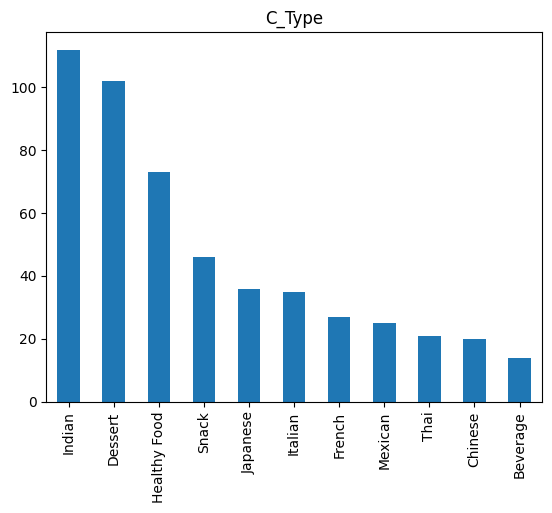

In [230]:
# visualisasi fitur C_Type
visualization_feature(fix_food_df, 'C_Type')

         Total sample  percentage
veg               347        67.9
non-veg           164        32.1


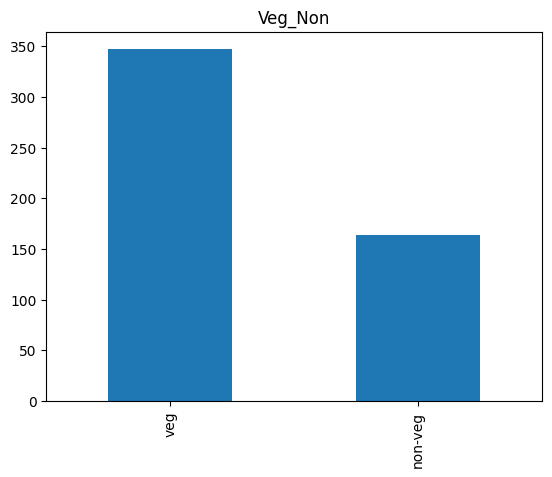

In [231]:
# visualisasi fitur Veg_Non
visualization_feature(fix_food_df, 'Veg_Non')

      Total sample  percentage
3.0             63        12.3
10.0            61        11.9
5.0             61        11.9
4.0             53        10.4
7.0             49         9.6
1.0             48         9.4
6.0             48         9.4
2.0             47         9.2
9.0             42         8.2
8.0             39         7.6


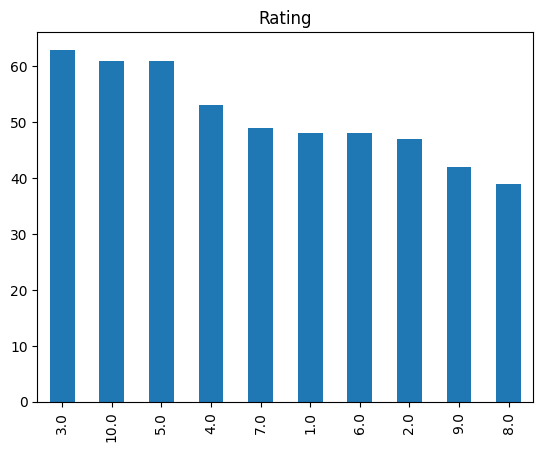

In [232]:
# visualisasi fitur Rating
visualization_feature(fix_food_df, 'Rating')

## Data Preparation

In [233]:
# Membuang data yang duplicate
food_content_df = fix_food_df.drop_duplicates('Food_ID')
food_content_df

,User_ID,Food_ID,Rating,Name,C_Type,Veg_Non,Describe
376,71.0,1.0,10.0,summer squash salad,Healthy Food,veg,"white balsamic vinegar, lemon juice, lemon rin..."
200,39.0,2.0,10.0,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni..."
456,89.0,3.0,7.0,sweet chilli almonds,Snack,veg,"almonds whole, egg white, curry leaves, salt, ..."
457,90.0,4.0,6.0,tricolour salad,Healthy Food,veg,"vinegar, honey/sugar, soy sauce, salt, garlic ..."
144,28.0,5.0,10.0,christmas cake,Dessert,veg,"christmas dry fruits (pre-soaked), orange zest..."
...,...,...,...,...,...,...,...
302,56.0,305.0,9.0,sunga pork,Japanese,veg,curry
419,80.0,306.0,8.0,banana chips,Snack,veg,dried slices of bananas (fruits of herbaceous ...
381,71.0,307.0,1.0,bhurji- egg,Indian,non-veg,"made using indian spices, onion, tomatoes, gre..."
494,97.0,308.0,3.0,flattened rice / poha,Indian,veg,dehusked rice which is flattened into flat lig...


In [234]:
# Buat fitur baru gabungan content yang relevan
relevan_features = ['C_Type', 'Veg_Non', 'Describe']

# Mix relevan_features menjadi fitur baru
# Dengan cara menggabung setiap string fitur
def join_features_content(df):
    return df[relevan_features[0]] + " " + df[relevan_features[1]] + " " + df[relevan_features[2]]

In [235]:
# Terapkan penggabungan string fitur ke feature baru 'content'
food_content_df['Description'] = food_content_df.apply(join_features_content, axis=1)

# Cek hasil data food_content_df
food_content_df.head()

<ipython-input-235-6ae0ab5f6373>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_content_df['Description'] = food_content_df.apply(join_features_content, axis=1)


,User_ID,Food_ID,Rating,Name,C_Type,Veg_Non,Describe,Description
376,71.0,1.0,10.0,summer squash salad,Healthy Food,veg,"white balsamic vinegar, lemon juice, lemon rin...","Healthy Food veg white balsamic vinegar, lemon..."
200,39.0,2.0,10.0,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni...","Healthy Food non-veg olive oil, chicken mince,..."
456,89.0,3.0,7.0,sweet chilli almonds,Snack,veg,"almonds whole, egg white, curry leaves, salt, ...","Snack veg almonds whole, egg white, curry leav..."
457,90.0,4.0,6.0,tricolour salad,Healthy Food,veg,"vinegar, honey/sugar, soy sauce, salt, garlic ...","Healthy Food veg vinegar, honey/sugar, soy sau..."
144,28.0,5.0,10.0,christmas cake,Dessert,veg,"christmas dry fruits (pre-soaked), orange zest...","Dessert veg christmas dry fruits (pre-soaked),..."


In [236]:
import string

# Buat fungsi untuk menghapus tanda baca pada text
def punctuation_cleaning(text):
    clear_text  = "".join([char for char in text if char not in string.punctuation])
    return clear_text

In [237]:
# Hapus text tanda baca pada fitur Content
# Replace fitur Content dengan text yang sudah di bersihkan
food_content_df['Description'] = food_content_df['Description'].apply(punctuation_cleaning)
food_content_df['Description']

<ipython-input-237-0f39a3268aa2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_content_df['Description'] = food_content_df['Description'].apply(punctuation_cleaning)


376    Healthy Food veg white balsamic vinegar lemon ...
200    Healthy Food nonveg olive oil chicken mince ga...
456    Snack veg almonds whole egg white curry leaves...
457    Healthy Food veg vinegar honeysugar soy sauce ...
144    Dessert veg christmas dry fruits presoaked ora...
                             ...                        
302                                   Japanese veg curry
419    Snack veg dried slices of bananas fruits of he...
381    Indian nonveg made using indian spices onion t...
494    Indian veg dehusked rice which is flattened in...
171    Snack veg grain made from rice usually made by...
Name: Description, Length: 309, dtype: object

In [238]:
# Mengonversi data series Food_ID ke bentuk list
food_id = food_content_df['Food_ID'].tolist()

# Mengonversi data series Name ke bentuk list
food_name = food_content_df['Name'].tolist()

# Mengonversi data series Description ke bentuk list
food_description = food_content_df['Description'].tolist()

print(len(food_id))
print(len(food_name))
print(len(food_description))

309
309
309


In [239]:
# Membuat dataframe baru yang hanya ada fitur yang relevan saja
final_food = pd.DataFrame({
    'id': food_id,
    'food_name': food_name,
    'food_description': food_description
})
final_food

,id,food_name,food_description
0,1.0,summer squash salad,Healthy Food veg white balsamic vinegar lemon ...
1,2.0,chicken minced salad,Healthy Food nonveg olive oil chicken mince ga...
2,3.0,sweet chilli almonds,Snack veg almonds whole egg white curry leaves...
3,4.0,tricolour salad,Healthy Food veg vinegar honeysugar soy sauce ...
4,5.0,christmas cake,Dessert veg christmas dry fruits presoaked ora...
...,...,...,...
304,305.0,sunga pork,Japanese veg curry
305,306.0,banana chips,Snack veg dried slices of bananas fruits of he...
306,307.0,bhurji- egg,Indian nonveg made using indian spices onion t...
307,308.0,flattened rice / poha,Indian veg dehusked rice which is flattened in...


## Content Based Filtering

**Menggunakan CountVectorizer untuk mengonversi kumpulan dokumen teks menjadi matriks jumlah token**

In [240]:
from sklearn.feature_extraction.text import CountVectorizer

# Inisialisasi CountVectorizer
cv = CountVectorizer(stop_words='english', ngram_range=(1, 3))

# Melakukan fit lalu ditransformasikan ke bentuk matrix pada data Content
cv_matrix = cv.fit_transform(final_food['food_description'])

# Mapping array dari fitur index integer ke fitur nama
cv.get_feature_names_out()

array(['10', '10 ml', '10 ml potato', ..., 'zucchini sea salt',
       'zucchini yellow', 'zucchini yellow zucchini'], dtype=object)

In [241]:
# Lihat dimensi tfidf_matrix
cv_matrix.shape

(309, 11083)

In [242]:
# Mengubah vektor countvectorizer dalam bentuk matriks dengan fungsi todense()
cv_matrix.todense()

matrix([[0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [243]:
# Melihat tf-idf matrix dalam bentuk dataframe
# Kolom diisi dengan nama makanan
# Baris diisi dengan content makanan

pd.DataFrame(
    cv_matrix.todense(),
    columns=cv.get_feature_names_out(),
    index=final_food.food_name
).sample(22, axis=1).sample(10, axis=0)

,quartered celery thyme,small cubes ghee,masala corn flour,red pizza,leaves deep fried,pepper yellow pepper,paneer cooked,tart apples,chinese nonveg boneless,refined oil curry,...,veg watermelon,sauted diced,deep fried,olive lemon,pepper salt,spring onions mango,offering hindu,fenugreek chilli,kerala tamil,red chillies fenugreek
food_name,,,,,,,,,,,,,,,,,,,,,
banana phirni tartlets with fresh strawberries,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
matcha tea macarons,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sticky rum chicken wings,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
almond pearls,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
baked almond kofta,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
apple and walnut cake,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
methi malai cranberry chicken,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fish curry,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
meat lovers pizza,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Menghitung kesamaan konten menggunakan Cosine Similiarity**

In [244]:
from sklearn.metrics.pairwise import cosine_similarity

# Meggunakan cosine_similarity untuk membuat menghitung kesamaan konten
cosine_similiarities = cosine_similarity(cv_matrix, cv_matrix)
cosine_similiarities

array([[1.        , 0.18513509, 0.09124148, ..., 0.        , 0.01112141,
        0.00826757],
       [0.18513509, 1.        , 0.04877565, ..., 0.07179582, 0.02972629,
        0.        ],
       [0.09124148, 0.04877565, 1.        , ..., 0.02830693, 0.03125382,
        0.04646767],
       ...,
       [0.        , 0.07179582, 0.02830693, ..., 1.        , 0.03450328,
        0.02564946],
       [0.01112141, 0.02972629, 0.03125382, ..., 0.03450328, 1.        ,
        0.08495908],
       [0.00826757, 0.        , 0.04646767, ..., 0.02564946, 0.08495908,
        1.        ]])

**Menghitung kesamaan konten menggunakan Cosine Similiarity**

In [245]:
from sklearn.metrics.pairwise import pairwise_distances

# Meggunakan jaccard similarity untuk membuat menghitung kesamaan konten
# Ubah data sparse matrix ke array
cv_array = cv_matrix.toarray()
jaccard_sim = 1 - pairwise_distances(cv_array, metric="jaccard")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [246]:
# Menyetel ulang indeks dan menarik keluar nama makanan dari dataframe food_content_df
indices = pd.Series(final_food.index, index=final_food['food_name'])
print(indices)

food_name
summer squash salad        0
chicken minced salad       1
sweet chilli almonds       2
tricolour salad            3
christmas cake             4
                        ... 
sunga pork               304
banana chips             305
bhurji- egg              306
flattened rice / poha    307
puffed rice              308
Length: 309, dtype: int64


In [247]:
# Buat fungsi untuk mendapatkan rekomendasi
def get_recommendations(name, method_sim):
  food_index = indices[name]
  sim_weight = list(enumerate(method_sim[food_index]))
  sim_weight = sorted(sim_weight, key=lambda x: x[1], reverse=True)

  # Mendapatkan skor similiarity top-n
  sim_weight = sim_weight[1:6]

  # Kumpulkan index top-n similiarity weight
  food_indices = [i[0] for i in sim_weight]

  # Show hasil dataframe berdasarkan index top-n similiarity weight
  return final_food.iloc[food_indices]

**Mendapatkan top 5 rekomendasi makanan menggunakan cosine similiarity**

In [248]:
food_name = 'roast turkey with cranberry sauce'
cosine_sim_recommend = get_recommendations(food_name, cosine_similiarities)
cosine_sim_recommend

,id,food_name,food_description
1,2.0,chicken minced salad,Healthy Food nonveg olive oil chicken mince ga...
86,87.0,roasted spring chicken with root veggies,Healthy Food nonveg whole chicken thyme garlic...
246,247.0,microwave chicken steak,Healthy Food nonveg chicken breasts boneless e...
70,71.0,carrot ginger soup,Healthy Food veg Carrots Olive Oil Salt Vegeta...
150,151.0,fish andlouse,French nonveg white wine and water mix to cove...


**Mendapatkan top 5 rekomendasi makanan menggunakan Jaccard Similarity**

In [249]:
jaccard_recommend = get_recommendations(food_name, jaccard_sim)
jaccard_recommend

,id,food_name,food_description
86,87.0,roasted spring chicken with root veggies,Healthy Food nonveg whole chicken thyme garlic...
1,2.0,chicken minced salad,Healthy Food nonveg olive oil chicken mince ga...
246,247.0,microwave chicken steak,Healthy Food nonveg chicken breasts boneless e...
70,71.0,carrot ginger soup,Healthy Food veg Carrots Olive Oil Salt Vegeta...
69,70.0,shepherds salad (tamatar-kheera salaad),Healthy Food veg 1 cucumber peeled and chopped...


## Evaluasi Model

**Melihat detail makanan yang akan dicari rekomendasinya**

In [250]:
user_food = final_food.loc[final_food['food_name'] == food_name]
user_food

,id,food_name,food_description
85,86.0,roast turkey with cranberry sauce,Healthy Food nonveg whole turkey butter onion ...


In [251]:
# Dari sampel makanan yang disukai diatas, kita dapat liat attributnya
attributes = user_food['food_description'].iloc[0].split(' ')
count = len(attributes)
attr_df = pd.DataFrame({'food_description':attributes})
attr_df

,food_description
0,Healthy
1,Food
2,nonveg
3,whole
4,turkey
5,butter
6,onion
7,celery
8,crumbled
9,sage


### Bandingkan attribute dari user_food dengan hasil rekomendasi untuk menentukan kriteria confusion matrix
- True Positive (TP): Item yang benar-benar disukai dan direkomendasikan dengan benar.
- False Positive (FP): Item yang tidak disukai tetapi direkomendasikan.
- True Negative (TN): Item yang tidak disukai dan tidak direkomendasikan.
- False Negative (FN): Item yang benar-benar disukai tetapi tidak direkomendasikan.

**- Pembuktian hasil rekomendasi Cosine similiarity**

Bandingkan atribut-atribut dari hasil rekomendasi cosine similiarity dengan atribut user_food 'roast turkey with cranberry sauce'
Kita lihat minimal dari **2 attribut awal** yaitu **Healthy Food, nonveg**, dll

Dari Hasil 5 rekomendasi, terdapat 4 data yang sesuai dan 1 data yang tidak sesuai yaitu makanan 'carrot ginger soup' dengan atribut **Healthy Food, veg**, ...

Dengan begitu hasilnya adalah **['TP0', 'TP1', 'TP2', 'FP3', 'TP4']**

In [252]:
# Buat kolom baru 'outcome' untuk menampung nilai hasil Cosine similiarity
conf_matrix_cosine_sim = cosine_sim_recommend
conf_matrix_cosine_sim['outcome'] = ['TP0', 'TP1', 'TP2', 'FP3', 'TP4']
conf_matrix_cosine_sim

<ipython-input-252-adf2a6e032cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conf_matrix_cosine_sim['outcome'] = ['TP0', 'TP1', 'TP2', 'FP3', 'TP4']


,id,food_name,food_description,outcome
1,2.0,chicken minced salad,Healthy Food nonveg olive oil chicken mince ga...,TP0
86,87.0,roasted spring chicken with root veggies,Healthy Food nonveg whole chicken thyme garlic...,TP1
246,247.0,microwave chicken steak,Healthy Food nonveg chicken breasts boneless e...,TP2
70,71.0,carrot ginger soup,Healthy Food veg Carrots Olive Oil Salt Vegeta...,FP3
150,151.0,fish andlouse,French nonveg white wine and water mix to cove...,TP4


**- Pembuktian hasil rekomendasi Jaccard similiarity**

Bandingkan atribut-atribut dari hasil rekomendasi cosine similiarity dengan atribut user_food 'roast turkey with cranberry sauce'
Kita lihat minimal dari **2 attribut awal** yaitu **Healthy Food, nonveg**, dll

Dari Hasil 5 rekomendasi, terdapat 3 data yang sesuai dan 2 data yang tidak sesuai yaitu makanan 'carrot ginger soup' dan 'fish andlouse' yang mempunyai atribut **Healthy Food, veg**, ...

Dengan begitu hasilnya adalah **['TP0', 'TP1', 'TP2', 'FP3', 'FP4']**

In [253]:
# Buat kolom baru 'outcome' untuk menampung nilai hasil Jaccard similiarity
conf_matrix_jaccard_sim = jaccard_recommend
conf_matrix_jaccard_sim['outcome'] = ['TP0', 'TP1', 'TP2', 'FP3', 'FP4']
conf_matrix_jaccard_sim

<ipython-input-253-ecac81f57f02>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conf_matrix_jaccard_sim['outcome'] = ['TP0', 'TP1', 'TP2', 'FP3', 'FP4']


,id,food_name,food_description,outcome
86,87.0,roasted spring chicken with root veggies,Healthy Food nonveg whole chicken thyme garlic...,TP0
1,2.0,chicken minced salad,Healthy Food nonveg olive oil chicken mince ga...,TP1
246,247.0,microwave chicken steak,Healthy Food nonveg chicken breasts boneless e...,TP2
70,71.0,carrot ginger soup,Healthy Food veg Carrots Olive Oil Salt Vegeta...,FP3
69,70.0,shepherds salad (tamatar-kheera salaad),Healthy Food veg 1 cucumber peeled and chopped...,FP4


### Menilai performa indikator menggunakan Precision, Recall dan F1 Score

In [254]:
# Fungsi untuk menghitung precision
def precision(actual_items, recommended_items):
    # Ubah list menjadi set untuk menghitung irisan dengan mudah
    actual_set = set(actual_items)
    recommended_set = set(recommended_items)

    # Hitung jumlah item yang direkomendasikan dengan benar
    true_positives = len(actual_set.intersection(recommended_set))

    # Hitung precision
    precision = true_positives / len(recommended_set)

    return precision

# Fungsi untuk menghitung recall
def recall(actual_items, recommended_items):
    # Ubah list menjadi set untuk menghitung irisan dengan mudah
    actual_set = set(actual_items)
    recommended_set = set(recommended_items)

    # Hitung jumlah item yang direkomendasikan dengan benar
    true_positives = len(actual_set.intersection(recommended_set))

    # Hitung recall
    recall = true_positives / len(actual_set)

    return recall

# Fungsi untuk menghitung F1-score
def f1_score(actual_items, recommended_items):
    # Hitung precision dan recall
    prec = precision(actual_items, recommended_items)
    rec = recall(actual_items, recommended_items)

    # Hitung F1-score
    f1 = 2 * (prec * rec) / (prec + rec)

    return f1

In [255]:
actual_items = ['TP0', 'TP1', 'TP2', 'TP3', 'TP4']
cosine_recommend_items = conf_matrix_cosine_sim['outcome'].to_numpy()
jaccard_recommend_items = conf_matrix_jaccard_sim['outcome'].to_numpy()

eval_df = pd.DataFrame(columns=['Cosine Similiarity', 'Jaccard Similiarity'], index=['Precision','Recall','F1-score'])

# Dictionary untuk setiap hasil evaluasi
cosine_dict = {
    'Precision': precision(actual_items, cosine_recommend_items),
    'Recall': recall(actual_items, cosine_recommend_items),
    'F1-score': f1_score(actual_items, cosine_recommend_items)
    }

jaccard_dict = {
    'Precision': precision(actual_items, jaccard_recommend_items),
    'Recall': recall(actual_items, jaccard_recommend_items),
    'F1-score': f1_score(actual_items, jaccard_recommend_items)
    }

# Kalkulasi precision, recall, dan f1-score pada setiap metode similiarity
for name, model in cosine_dict.items():
    eval_df.loc[name, 'Cosine Similiarity'] = model

for name, model in jaccard_dict.items():
    eval_df.loc[name, 'Jaccard Similiarity'] = model

eval_df

,Cosine Similiarity,Jaccard Similiarity
Precision,0.8,0.6
Recall,0.8,0.6
F1-score,0.8,0.6


Dapat dilihat bahwa hasil **Cosine Similiarity** lebih baik dibandingkan **Jaccard Similiarity** dengan **F1-Score 0.8 > 0.6**

**Kesimpulan**

Kesimpulan hasil dari sistem rekomendasi top-n menggunakan metode cosine similarity dan Jaccard Similarity sebagai berikut:

1. Cosine Similarity:
   - Metode cosine similarity digunakan untuk mengukur kesamaan arah antara dua vektor dalam ruang vektor.
   - Sistem rekomendasi top-n menggunakan cosine similarity dapat memberikan rekomendasi berdasarkan kesamaan konten antara item-item dalam dataset makanan, seperti deskripsi resep makanan.
   - Semakin tinggi nilai cosine similarity antara dua item, semakin mirip mereka dalam hal konten atau atribut yang dimiliki.
   - Hasil rekomendasi berdasarkan cosine similarity dapat membantu pengguna menemukan resep makanan yang serupa atau relevan dengan preferensi mereka.

2. Jaccard Similarity:
   - Jaccard Similarity digunakan untuk mengukur perbedaan antara dua himpunan berdasarkan elemen-elemen yang sama di antara keduanya.
   - Sistem rekomendasi top-n menggunakan Jaccard Similarity dapat memberikan rekomendasi berdasarkan kesamaan himpunan kata-kata atau fitur dalam deskripsi resep makanan.
   - Semakin rendah nilai Jaccard Similarity antara dua item, semakin mirip himpunan kata-kata atau fitur yang dimiliki.
   - Hasil rekomendasi berdasarkan Jaccard Similarity dapat membantu pengguna menemukan resep makanan dengan kata-kata atau fitur yang serupa dengan preferensi mereka.

Kedua metode, cosine similarity dan Jaccard Similarity, dapat memberikan hasil rekomendasi yang bermanfaat dalam sistem rekomendasi makanan berdasarkan konten. Pemilihan metode yang tepat tergantung pada karakteristik dataset dan tujuan rekomendasi yang ingin dicapai. Adapun evaluasi performa dan kualitas rekomendasi dari kedua metode tersebut dapat dilakukan dengan menggunakan metrik evaluasi seperti precision, recall dan F1-Score.